# VizSeq

## Dependencies

In [2]:
!pip install -q git+https://github.com/facebookresearch/vizseq

Make sure to have NLTK version 3.4.5 installed

In [23]:
!pip install -q 'nltk==3.4.5'

     |████████████████████████████████| 1.5MB 2.9MB/s 
  Created wheel for nltk: filename=nltk-3.4.5-cp36-none-any.whl size=1449907 sha256=b1a12c5d709cad33efc7bc62c83da89fdaf1f5581cb2aa241e7d18f647fa1837
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [0]:
import pandas as pd
from typing import List, Dict
import os.path as op
from glob import glob
import vizseq

## Data
Downalod the data for the NLP task and prepare inputs for VizSeq

In [2]:
!curl -O http://www.manythings.org/anki/fra-eng.zip
!unzip -q fra-eng.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5800k  100 5800k    0     0  12.6M      0 --:--:-- --:--:-- --:--:-- 12.6M
replace _about.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [0]:
df = pd.read_csv('fra.txt', sep='\t', names=['en', 'fr', 'license'])[['en', 'fr']]

VizSeq expects input to be organized as follows (see [documentation](https://facebookresearch.github.io/vizseq/docs/features/data/)):
* Sources: Source-side inputs for text generation tasks.
* References: Target-side references for text generation tasks.
* Hypothesis: Model predictions. One sentence per example per model.
* Tags: Per-example tags for example grouping.

In [0]:
sources = {'fra.txt': df['fr'].values.tolist()}
references = {'fra.txt': df['en'].values.tolist()}

## Dataset statistics
VizSeq let you quickly view simple statistics on your dataset using `vizseq.view_stats`

,Type,Examples,Tokens / Frames,Chars / Duration (ms)
Source fra.txt,Text,"174,481","1,170,035","6,317,810"
Reference fra.txt,Text,"174,481","1,075,042","5,340,266"


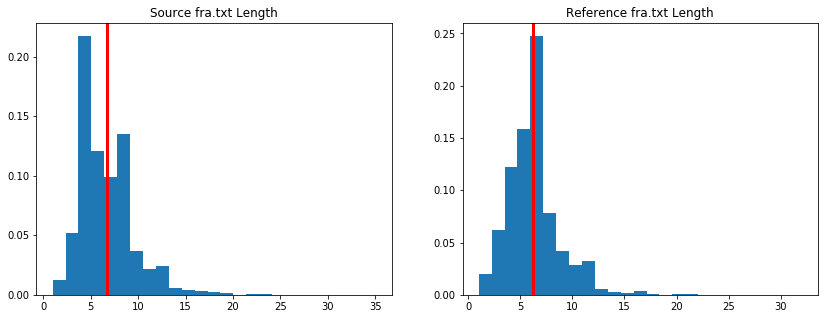

In [30]:
%matplotlib inline
vizseq.view_stats(sources, references)

## n-grams
VizSeq let you view statistics on n-grams in your dataset using `vizseq.view_n_grams`

### Source-side n-grams

In [31]:
vizseq.view_n_grams(sources)

1-gram,Count
je,42270
de,36494
pas,26556
que,25699
à,21778
ne,21423
le,20281
la,19971
vous,18058
?,17974


### Refrence-side n-grams

In [32]:
vizseq.view_n_grams(references)

1-gram,Count
i,48047
you,38499
to,38412
the,34629
a,25113
is,16917
tom,12967
he,12131
of,11668
do,10968


## Inference evaluation

### Metrics inspection
VizSeq let you analyze the performance of your Machine Translation model by comparing the References (true translation) against Hypothesis (inference output) using popular NLP metrics, e.g. BLUE.

In [33]:
vizseq.available_scorers()

Available scorers: bert_score, bleu, bp, chrf, cider, gleu, laser, meteor, nist, ribes, rouge_1, rouge_2, rouge_l, ter, wer, wer_del, wer_ins, wer_sub


Compare metrics, for the sake of example we will assume that hypothesis is same as referneces

In [0]:
hypothesis = references

In [36]:
vizseq.view_scores(references, hypothesis, ['bleu', 'meteor'])

CSV LaTeX,fra.txt
All,100.0
CSV LaTeX,fra.txt
All,0.994


### Examples inspection
VizSeq let you manually inspect the examples with `vizseq.view_examples`

In [42]:
vizseq.view_examples(sources, references, hypothesis, ['bleu'], page_sz=2, page_no=12)

Source fra.txt,J'ai gagné !
Reference fra.txt,I won!
fra.txt,I won!
Model,bleu
fra.txt,100.0
Source fra.txt,Je l'ai emporté !
Reference fra.txt,I won!
fra.txt,I won!
Model,bleu
fra.txt,100.0


Check official VizSeq website for more details - [link](https://facebookresearch.github.io/vizseq/).